<h1 style = "text-align : center " >PRINCIPAL COMPONENTS ANALYSIS ALGORRITHM @ByFD </h1>

<h1 style = "text-align : center " > 1. PCA WITH NUMPY AND SVD ALGORITHM</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("my_courses.csv") #Lectures des donnees brutes

In [3]:
Data #Visualisation des donnees brutes

,titreCours,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
0,Classez_et_segmentez_des_données_visuelles,29,34,NaN,15,3,11,0.666667,3,22,4470531
1,Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12,2,21,0.750000,4,8,4525306
2,Découvrez_les_librairies_Python_pour_la_Data_S...,64,64,96.0,10,2,8,0.000000,2,57,4452741
3,Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6,1,12,1.000000,3,29,3595541
4,Initiez-vous_à_l'algèbre_relationnelle_avec_le...,192,14,92.0,20,2,25,0.500000,4,25,4449026
5,Entraînez_un_modèle_prédictif_linéaire,193,65,84.0,10,2,9,0.500000,2,182,4444646
6,Explorez_vos_données_avec_des_algorithmes_non_...,193,75,85.0,15,3,13,0.666667,3,22,4379436
7,Décrivez_et_nettoyez_votre_jeu_de_données,195,3,95.0,15,2,24,0.750000,4,13,4525266
8,Créez_votre_Data_Lake,203,44,89.0,8,2,7,0.500000,2,186,4467481
9,Développez_une_application_iPhone_avec_le_modè...,218,3,94.0,30,2,20,0.750000,4,61,4504796


In [4]:
Data_cleaned = Data.fillna ( Data . mean ()) #Nettoyage des donnees

In [79]:
Data_cleaned #Donnees nettoyees

,titreCours,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
0,Classez_et_segmentez_des_données_visuelles,29,34,89.4,15,3,11,0.666667,3,22,4470531
1,Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12,2,21,0.750000,4,8,4525306
2,Découvrez_les_librairies_Python_pour_la_Data_S...,64,64,96.0,10,2,8,0.000000,2,57,4452741
3,Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6,1,12,1.000000,3,29,3595541
4,Initiez-vous_à_l'algèbre_relationnelle_avec_le...,192,14,92.0,20,2,25,0.500000,4,25,4449026
5,Entraînez_un_modèle_prédictif_linéaire,193,65,84.0,10,2,9,0.500000,2,182,4444646
6,Explorez_vos_données_avec_des_algorithmes_non_...,193,75,85.0,15,3,13,0.666667,3,22,4379436
7,Décrivez_et_nettoyez_votre_jeu_de_données,195,3,95.0,15,2,24,0.750000,4,13,4525266
8,Créez_votre_Data_Lake,203,44,89.0,8,2,7,0.500000,2,186,4467481
9,Développez_une_application_iPhone_avec_le_modè...,218,3,94.0,30,2,20,0.750000,4,61,4504796


In [80]:
Data_cleaned.describe() #Statistiques des donnees

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.00000,16.000000,1.600000e+01
mean,236.437500,34.812500,89.400000,16.687500,2.06250,17.187500,0.617560,3.50000,69.437500,4.046309e+06
std,169.706794,31.447774,3.860915,9.658977,0.57373,8.526185,0.246053,1.21106,64.186155,1.058250e+06
min,29.000000,2.000000,84.000000,6.000000,1.00000,7.000000,0.000000,2.00000,8.000000,2.353440e+05
25%,163.000000,4.000000,85.750000,10.000000,2.00000,10.500000,0.500000,3.00000,22.000000,4.236737e+06
50%,199.000000,34.000000,89.700000,15.000000,2.00000,16.500000,0.666667,3.50000,43.000000,4.432896e+06
75%,291.250000,59.500000,92.000000,20.000000,2.00000,21.750000,0.750000,4.00000,106.000000,4.468244e+06
max,713.000000,100.000000,96.000000,40.000000,3.00000,38.000000,1.000000,7.00000,186.000000,4.525306e+06


In [238]:
Data_pca = Data_cleaned[["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]]

In [239]:
Data_pca #Donnees sur lesquelles om va appliquer le pca

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
0,29,34,89.4,15,3,11,0.666667,3
1,55,4,86.0,12,2,21,0.750000,4
2,64,64,96.0,10,2,8,0.000000,2
3,76,100,91.0,6,1,12,1.000000,3
4,192,14,92.0,20,2,25,0.500000,4
5,193,65,84.0,10,2,9,0.500000,2
6,193,75,85.0,15,3,13,0.666667,3
7,195,3,95.0,15,2,24,0.750000,4
8,203,44,89.0,8,2,7,0.500000,2
9,218,3,94.0,30,2,20,0.750000,4


In [268]:
Data_pca_standard = (Data_pca - Data_pca.mean())/Data_pca.std() #Donnees Centrees-Reduites

In [269]:
Data_pca_standard

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
0,-1.222329,-0.025836,0.000000,-0.174708,1.634043,-0.725706,0.199580,-0.412861
1,-1.069123,-0.979799,-0.880620,-0.485300,-0.108936,0.447152,0.538261,0.412861
2,-1.016091,0.928126,1.709439,-0.692361,-0.108936,-1.077563,-2.509868,-1.238584
3,-0.945381,2.072881,0.414410,-1.106484,-1.851915,-0.608420,1.554304,-0.412861
4,-0.261849,-0.661812,0.673415,0.342945,-0.108936,0.916295,-0.477782,0.412861
5,-0.255956,0.959925,-1.398632,-0.692361,-0.108936,-0.960277,-0.477782,-1.238584
6,-0.255956,1.277912,-1.139626,-0.174708,1.634043,-0.491134,0.199580,-0.412861
7,-0.244171,-1.011598,1.450433,-0.174708,-0.108936,0.799009,0.538261,0.412861
8,-0.197031,0.292151,-0.103602,-0.899422,-0.108936,-1.194849,-0.477782,-1.238584
9,-0.108643,-1.011598,1.191427,1.378252,-0.108936,0.329866,0.538261,0.412861


In [270]:
Data_pca_standard = np.matrix(Data_pca_standard) #Lamatrice de donnees

In [271]:
Data_pca_standard

matrix([[-1.22232879, -0.02583649,  0.        , -0.17470795,  1.63404251,
         -0.72570556,  0.1995799 , -0.41286141],
        [-1.06912337, -0.97979907, -0.88062021, -0.48529985, -0.10893617,
          0.44715191,  0.53826095,  0.41286141],
        [-1.01609073,  0.9281261 ,  1.70943923, -0.69236112, -0.10893617,
         -1.07756281, -2.50986845, -1.23858424],
        [-0.94538054,  2.0728812 ,  0.41440951, -1.10648366, -1.85191485,
         -0.60841982,  1.55430408, -0.41286141],
        [-0.26184868, -0.66181154,  0.67341545,  0.34294523, -0.10893617,
          0.9162949 , -0.47778219,  0.41286141],
        [-0.25595616,  0.95992485, -1.39863209, -0.69236112, -0.10893617,
         -0.96027706, -0.47778219, -1.23858424],
        [-0.25595616,  1.27791238, -1.13962615, -0.17470795,  1.63404251,
         -0.49113407,  0.1995799 , -0.41286141],
        [-0.24417113, -1.01159783,  1.45043328, -0.17470795, -0.10893617,
          0.79900916,  0.53826095,  0.41286141],
        [-0.1970

In [272]:
U, Singular_value, Principal_components = np.linalg.svd(Data_pca_standard) #Utilisation oof SVD to calculate The principal components

In [273]:
Principal_components 

matrix([[ 0.34933787, -0.4302033 , -0.09120044,  0.4733088 ,  0.16673833,
          0.46937238,  0.13200943,  0.44160032],
        [-0.07932353,  0.03420204, -0.48750831,  0.20754293,  0.6830222 ,
         -0.06068212, -0.38521558, -0.30529803],
        [ 0.12612335, -0.12894105,  0.63107596,  0.09984288,  0.03215308,
         -0.02034355, -0.74623339,  0.03049082],
        [-0.72651636, -0.38371752,  0.34213089,  0.08631319,  0.21131964,
          0.22908125,  0.23844836, -0.21549825],
        [ 0.24917177, -0.12130952,  0.33044337, -0.04780442,  0.51336455,
         -0.61634503,  0.38124025,  0.1514954 ],
        [ 0.10379257, -0.79640774, -0.28703855, -0.32659886, -0.23164802,
         -0.2519286 , -0.14133497, -0.16970406],
        [ 0.27891092, -0.02082455,  0.11619709,  0.58546051, -0.26206251,
         -0.12916966,  0.19236581, -0.66568995],
        [-0.42105455, -0.02180493, -0.18336302,  0.5135855 , -0.27222869,
         -0.51291438, -0.13467097,  0.41172765]])

In [274]:
Principal_components[0] #The first Principal Components

matrix([[ 0.34933787, -0.4302033 , -0.09120044,  0.4733088 ,  0.16673833,
          0.46937238,  0.13200943,  0.44160032]])

In [275]:
Eigenvalues = (Singular_value * Singular_value)/(np.shape(Data_pca_standard)[0] - 2) #Valeur propres de la matrice de donees

In [276]:
Eigenvalues

array([3.79628657, 1.69750776, 1.13347503, 0.99134917, 0.34534455,
       0.31031311, 0.21403362, 0.08311877])

In [277]:
explained_variance_ratio  = Eigenvalues/sum(Eigenvalues) #Taux de variance expliquee

In [278]:
explained_variance_ratio

array([0.4429001 , 0.19804257, 0.13223875, 0.1156574 , 0.0402902 ,
       0.0362032 , 0.02497059, 0.00969719])

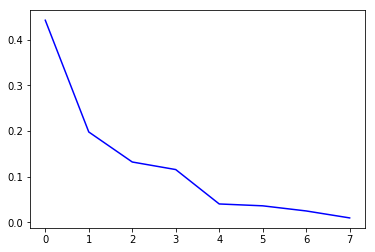

In [280]:
plt.plot(explained_variance_ratio, "b")

In [289]:
Principal_components_4 = Principal_components.T[:,:4] #Projections des donnees dur l'hyperplan factoriel (4 composantes prinsipales)

In [290]:
Principal_components_4

matrix([[ 0.34933787, -0.07932353,  0.12612335, -0.72651636],
        [-0.4302033 ,  0.03420204, -0.12894105, -0.38371752],
        [-0.09120044, -0.48750831,  0.63107596,  0.34213089],
        [ 0.4733088 ,  0.20754293,  0.09984288,  0.08631319],
        [ 0.16673833,  0.6830222 ,  0.03215308,  0.21131964],
        [ 0.46937238, -0.06068212, -0.02034355,  0.22908125],
        [ 0.13200943, -0.38521558, -0.74623339,  0.23844836],
        [ 0.44160032, -0.30529803,  0.03049082, -0.21549825]])

In [291]:
Data_projected = Data_pca_standard * Principal_components_4

In [292]:
Data_projected

matrix([[-0.72272352,  1.26910554, -0.26249492,  1.19849633],
        [ 0.34373594, -0.05504759, -1.01437617,  0.92831683],
        [-2.64007165,  0.47124395,  2.61543335,  0.3057293 ],
        [-2.35501793, -1.98645836, -1.4550941 , -0.13341962],
        [ 0.82531071, -0.33098949,  0.85850856,  0.6881713 ],
        [-1.78144507,  1.13733715, -0.77302181, -0.81067425],
        [-0.73197425,  1.77838325, -1.03268219, -0.34002585],
        [ 0.74516778, -1.21487154,  0.58869392,  1.24611476],
        [-1.79979437,  0.44974621,  0.12187403, -0.22578621],
        [ 1.3309609 , -0.74858019,  0.6069307 ,  1.08560663],
        [-0.72338851, -2.15629947, -0.19248454, -0.36530445],
        [ 0.73953441, -0.35506803, -1.2197303 ,  0.58766591],
        [ 3.4605824 ,  2.12260214, -0.05966936,  0.32548912],
        [ 0.54737406,  0.55933467, -0.20631259, -1.23682739],
        [-1.15643682,  0.28571087,  0.93218434, -1.49744518],
        [ 3.91818593, -1.22614911,  0.49224109, -1.75610722]])

In [293]:
Data_projected_frame = pd.DataFrame(Data_projected, columns = ['A', 'B', 'C', 'D'])

In [294]:
Data_projected_frame #Donnees apres PCA

,A,B,C,D
0,-0.722724,1.269106,-0.262495,1.198496
1,0.343736,-0.055048,-1.014376,0.928317
2,-2.640072,0.471244,2.615433,0.305729
3,-2.355018,-1.986458,-1.455094,-0.133420
4,0.825311,-0.330989,0.858509,0.688171
5,-1.781445,1.137337,-0.773022,-0.810674
6,-0.731974,1.778383,-1.032682,-0.340026
7,0.745168,-1.214872,0.588694,1.246115
8,-1.799794,0.449746,0.121874,-0.225786
9,1.330961,-0.748580,0.606931,1.085607


<h1 style = "text-align : center " > 2. PCA WITH SCIKITLEARN </h1>

In [311]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [47]:
std_scale = preprocessing.StandardScaler().fit(Data_pca)
Data_scaled = std_scale.transform(Data_pca)

/home/falloudiakhate/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/falloudiakhate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [48]:
Data_scaled

array([[-1.26241575, -0.02668381,  0.        , -0.18043759,  1.68763185,
        -0.74950548,  0.20612524, -0.42640143],
       [-1.10418587, -1.01193213, -0.90950064, -0.50121553, -0.11250879,
         0.46181651,  0.55591351,  0.42640143],
       [-1.04941399,  0.95856451,  1.76550124, -0.71506749, -0.11250879,
        -1.11290208, -2.59218099, -1.2792043 ],
       [-0.97638482,  2.1408625 ,  0.4280003 , -1.14277141, -1.91264943,
        -0.62837328,  1.60527835, -0.42640143],
       [-0.27043615, -0.68351602,  0.69550049,  0.35419231, -0.11250879,
         0.94634531, -0.49345132,  0.42640143],
       [-0.26435039,  0.99140613, -1.44450102, -0.71506749, -0.11250879,
        -0.99176988, -0.49345132, -1.2792043 ],
       [-0.26435039,  1.31982223, -1.17700083, -0.18043759,  1.68763185,
        -0.50724108,  0.20612524, -0.42640143],
       [-0.25217886, -1.04477374,  1.49800105, -0.18043759, -0.11250879,
         0.82521311,  0.55591351,  0.42640143],
       [-0.20349275,  0.3017323 

In [301]:
pca = decomposition.PCA(n_components=6)
pca.fit(Data_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [302]:
pca.components_

array([[ 0.34933787, -0.4302033 , -0.09120044,  0.4733088 ,  0.16673833,
         0.46937238,  0.13200943,  0.44160032],
       [ 0.07932353, -0.03420204,  0.48750831, -0.20754293, -0.6830222 ,
         0.06068212,  0.38521558,  0.30529803],
       [ 0.12612335, -0.12894105,  0.63107596,  0.09984288,  0.03215308,
        -0.02034355, -0.74623339,  0.03049082],
       [ 0.72651636,  0.38371752, -0.34213089, -0.08631319, -0.21131964,
        -0.22908125, -0.23844836,  0.21549825],
       [-0.24917177,  0.12130952, -0.33044337,  0.04780442, -0.51336455,
         0.61634503, -0.38124025, -0.1514954 ],
       [-0.10379257,  0.79640774,  0.28703855,  0.32659886,  0.23164802,
         0.2519286 ,  0.14133497,  0.16970406]])

In [303]:
pca.components_[0]

array([ 0.34933787, -0.4302033 , -0.09120044,  0.4733088 ,  0.16673833,
        0.46937238,  0.13200943,  0.44160032])

In [304]:
pca.explained_variance_

array([3.77941418, 1.68996328, 1.12843737, 0.98694317, 0.34380968,
       0.30893394])

In [305]:
pca.explained_variance_ratio_

array([0.4429001 , 0.19804257, 0.13223875, 0.1156574 , 0.0402902 ,
       0.0362032 ])

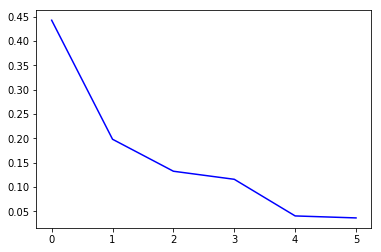

In [306]:
plt.plot(pca.explained_variance_ratio_, "b")

In [251]:
Data_projected_ = pca.transform(Data_scaled)

In [307]:
Data_projected_

array([[-0.74642565, -1.31072656, -0.27110359, -1.23780169, -1.03961408,
         0.20973282],
       [ 0.35500896,  0.05685291, -1.04764321, -0.9587615 ,  0.49481495,
        -0.87484805],
       [-2.72665428, -0.48669866,  2.70120794, -0.31575586,  0.31404944,
         0.25566999],
       [-2.43225206,  2.05160537, -1.50281472,  0.13779519,  0.35412795,
         1.10911898],
       [ 0.85237724,  0.34184448,  0.88666383, -0.71074026,  0.53613539,
         0.0139952 ],
       [-1.83986856, -1.17463676, -0.79837349,  0.83726077,  0.45768071,
        -0.39391231],
       [-0.75597975, -1.83670632, -1.06654958,  0.35117719, -0.58670921,
         0.90169761],
       [ 0.76960597,  1.25471393,  0.60800046, -1.28698179, -0.27769582,
        -0.10207385],
       [-1.85881963, -0.46449589,  0.12587096,  0.23319099, -0.24265714,
        -0.69645326],
       [ 1.37461051,  0.77313029,  0.62683533, -1.12120971, -0.44614327,
         0.20837705],
       [-0.74711244,  2.22701652, -0.19879717,  0.

In [308]:
Data_projected_frame_= pd.DataFrame(Data_projected_, columns = ['A', 'B', 'C', 'D', "E", "F"])

In [309]:
Data_projected_frame_

,A,B,C,D,E,F
0,-0.746426,-1.310727,-0.271104,-1.237802,-1.039614,0.209733
1,0.355009,0.056853,-1.047643,-0.958762,0.494815,-0.874848
2,-2.726654,-0.486699,2.701208,-0.315756,0.314049,0.255670
3,-2.432252,2.051605,-1.502815,0.137795,0.354128,1.109119
4,0.852377,0.341844,0.886664,-0.710740,0.536135,0.013995
5,-1.839869,-1.174637,-0.798373,0.837261,0.457681,-0.393912
6,-0.755980,-1.836706,-1.066550,0.351177,-0.586709,0.901698
7,0.769606,1.254714,0.608000,-1.286982,-0.277696,-0.102074
8,-1.858820,-0.464496,0.125871,0.233191,-0.242657,-0.696453
9,1.374611,0.773130,0.626835,-1.121210,-0.446143,0.208377


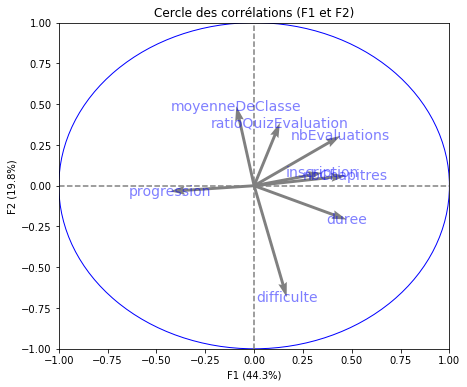

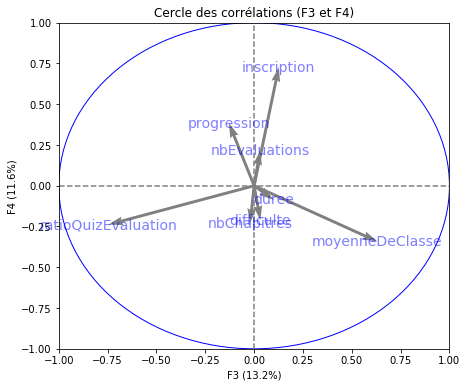

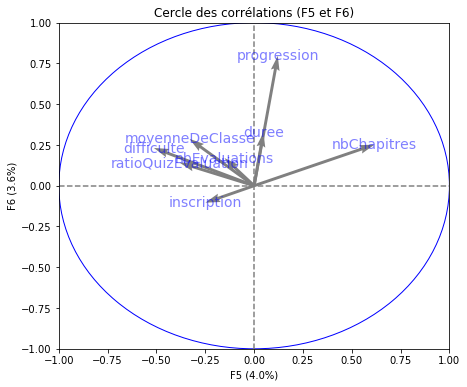

In [314]:
pcs = pca.components_
display_circles(pcs, 6 , pca, [(0,1),(2,3),(4,5)], labels = np.array(Data_pca.columns))